# Lab 4: Solving ODEs
***Gavela Maculuve***

## Importing Initial Libraries and ode_solver.py

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy.integrate import solve_ivp

In [2]:
from ode_solver import Euler, rungekutta4, Euler_Backwards, TestEuler, TestRungeKutta4, TestEulerBackwards

In [3]:
plt.style.use('seaborn-v0_8-whitegrid')

In [4]:
TestEuler()
TestRungeKutta4()
TestEulerBackwards()

-- Testing Euler's Method Convergence Order --
Test Problem: y' = -y*sin(t) on [0, 8], y(0)=1, Exact: 0.318065
  h = 0.1     | Approx at t=8: 0.272658| Abs Error: 4.540641e-02
  h = 0.05    | Approx at t=8: 0.294503| Abs Error: 2.356180e-02
  h = 0.025   | Approx at t=8: 0.306053| Abs Error: 1.201230e-02
  h = 0.01    | Approx at t=8: 0.313202| Abs Error: 4.862776e-03
  h = 0.005   | Approx at t=8: 0.315624| Abs Error: 2.441233e-03

Calculated Convergence Order (slope): 0.9771
Test Passed: Order is approximately 1.
Saved convergence plot to 'plots_Euler_RK4_ImplicitEuler\euler_convergence.png'

-- Testing Runge-Kutta 4th Order Method Convergence Order --
Test Problem: y' = -y*sin(t) on [0, 8], y(0)=1, Exact: 0.318065
  h = 0.1     | Approx at t=8: 0.318065| Abs Error: 1.450662e-07
  h = 0.05    | Approx at t=8: 0.318065| Abs Error: 9.762798e-09
  h = 0.025   | Approx at t=8: 0.318065| Abs Error: 6.310043e-10
  h = 0.01    | Approx at t=8: 0.318065| Abs Error: 1.646761e-11
  h = 0.005  

## Exercise 1

Use Euler/RK4's method to approximate/plot the solutions for each of the following initial-value problems. (Plot your solution for all the values of t)

1. $y'=3e^{-ty}$, $1\leq t \leq 3$, $y(0)=1/2$, with $h=0.005$

In [5]:
f1 = lambda t, y: 3*np.exp(-t*y) # function

t0, t_end, y0, h = 1, 3, np.array([0.5]), 0.005 # variables

t_eul1, y_eul1 = Euler(f1, t0, t_end, y0, h) # calculating Euler
t_rk4_1, y_rk4_1 = rungekutta4(f1, t0, t_end, y0, h) # calculating RK4

print(f"Euler approx = {y_eul1[-1, 0]:.6f}\nRK4 approx = {y_rk4_1[-1, 0]:.6f}")

Euler approx = 1.372556
RK4 approx = 1.370404


2. $y'=\frac{1+t^2}{1+2y}$, $2\leq t \leq 5$, $y(2)=3$, with $h=0.01$

In [6]:
f2 = lambda t, y: (1+t**2)/(1+2*y)
 
t0, t_end, y0, h = 2, 5, np.array([3]), 0.01
t_eul2, y_eul2 = Euler(f2, t0, t_end, y0, h)
t_rk4_2, y_rk4_2 = rungekutta4(f2, t0, t_end, y0, h)

print(f"Euler approx = {y_eul2[-1, 0]:.6f}\nRK4 approx = {y_rk4_2[-1, 0]:.6f}")

Euler approx = 6.861900
RK4 approx = 6.865460


3. $y' = t^{2}\sin(y)$, $0 \leq t \leq 4$, $y(0) = 2$, with $h=0.001$

In [7]:
f3 = lambda t, y: (t**2) * np.sin(y)

t0, t_end, y0, h = 0, 4, np.array([2]), 0.001
t_eul3, y_eul3 = Euler(f3, t0, t_end, y0, h)
t_rk4_3, y_rk4_3 = rungekutta4(f3, t0, t_end, y0, h)

print(f"Euler approx = {y_eul3[-1, 0]:.6f}\nRK4 approx = {y_rk4_3[-1, 0]:.6f}")

Euler approx = 3.141593
RK4 approx = 3.141593


4. $ y' = \frac{t^3}{y},\; 1 < t < 10, \; y(1) = 1$, with $h=0.002$

In [8]:
f4 = lambda t, y:(t**3)/y

t0, t_end, y0, h = 1, 10, np.array([1]), 0.002
t_eul4, y_eul4 = Euler(f4, t0, t_end, y0, h)
t_rk4_4, y_rk4_4 = rungekutta4(f4, t0, t_end, y0, h)

print(f"Euler approx = {y_eul4[-1, 0]:.6f}\nRK4 approx = {y_rk4_4[-1, 0]:.6f}")

Euler approx = 70.709483
RK4 approx = 70.714214


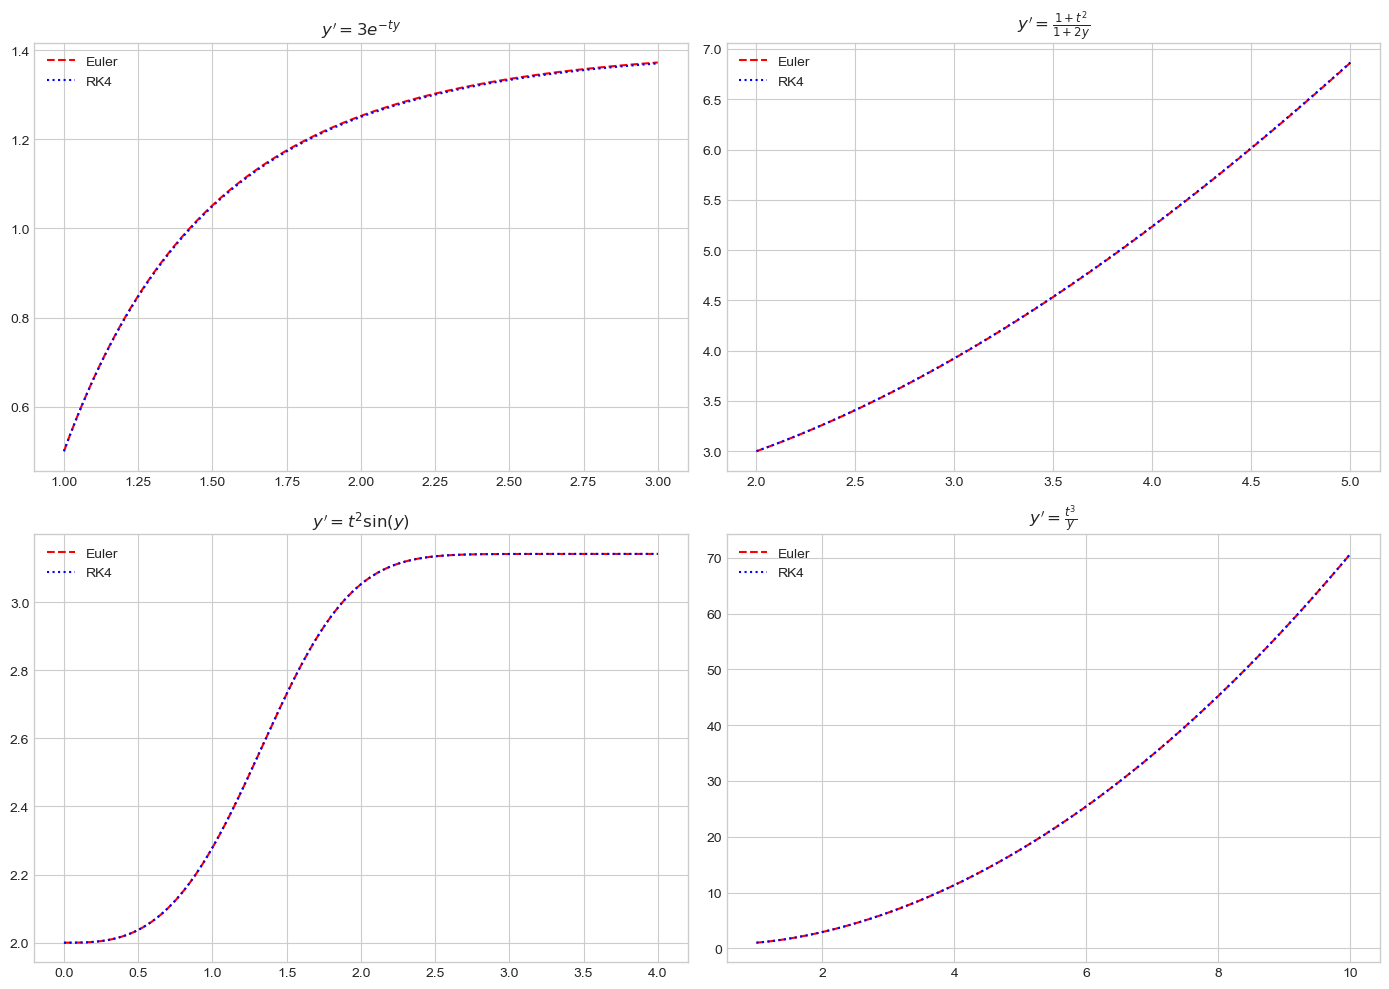

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# --- Exercise 1 ---
axes[0,0].plot(t_eul1, y_eul1[:,0], '--', label="Euler", color='red')
axes[0,0].plot(t_rk4_1, y_rk4_1[:,0], ':', label="RK4", color ='blue')
axes[0,0].set_title(r"$y' = 3e^{-ty}$")
axes[0,0].legend()

# --- Exercise 2 ---
axes[0,1].plot(t_eul2, y_eul2[:,0], '--', label="Euler", color='red')
axes[0,1].plot(t_rk4_2, y_rk4_2[:,0], ':', label="RK4", color='blue')
axes[0,1].set_title(r"$y' = \frac{1+t^2}{1+2y}$")
axes[0,1].legend()

# --- Exercise 3 ---
axes[1,0].plot(t_eul3, y_eul3[:,0], '--', label="Euler", color='red')
axes[1,0].plot(t_rk4_3, y_rk4_3[:,0], ':', label="RK4", color = 'blue')
axes[1,0].set_title(r"$y' = t^2 \sin(y)$")
axes[1,0].legend()

# --- Exercise 4 ---
axes[1,1].plot(t_eul4, y_eul4[:,0], '--', label="Euler", color='red')
axes[1,1].plot(t_rk4_4, y_rk4_4[:,0], ':', label="RK4", color = 'blue')
axes[1,1].set_title(r"$y' = \frac{t^3}{y}$")
axes[1,1].legend()

plt.tight_layout()
plt.show()


## Exercise 2

Use Euler/RK4's method to approximate/plot the solutions for each of the following initial-value problem.
$$ y'= \frac{2-2ty}{t^2+1}, ~~~~ 1\leq t \leq 4, ~~~~ y(1)=2$$
The actual solutions to the initial-value is 
$$y(t)=\frac{2t+2}{t^2+1}.$$

In [10]:
yprime = lambda t, y: (2-2*t*y)/(t**2 + 1) # y'
yexact = lambda t: (2*t + 2)/(t**2 + 1) # y(t)

1. Compute/plot the error of your approximation and bound the error for $1\leq t \leq 4$, for $h=0.01, 0.005, 0.001$

In [11]:
t0, t_end, y0 = 1, 4, np.array([2.0])
hvals = [0.01, 0.005, 0.001]

In [12]:
# empty dictionaries so that we can store the final approximations for each h
eulr_approximations_4 = {}
rk4_approximations_4 = {}

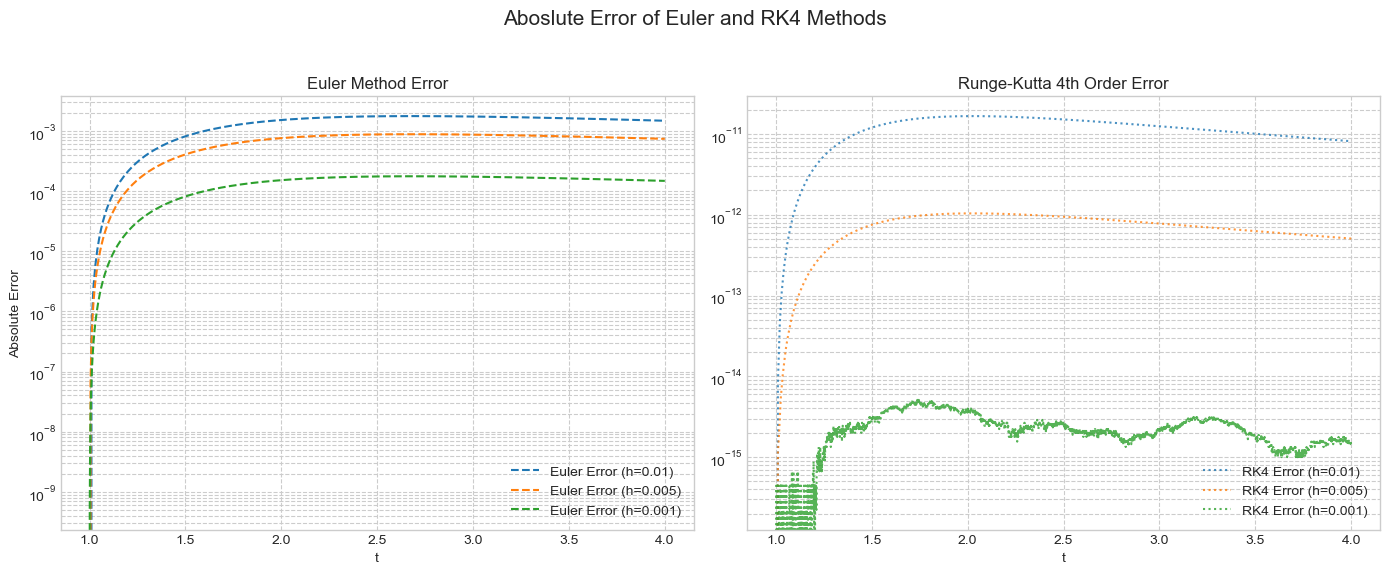

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle("Aboslute Error of Euler and RK4 Methods", fontsize = 15)

for h in hvals:
    t_eul5, y_eul5 = Euler(yprime, t0, t_end, y0, h)
    t_rk4_5, y_rk4_5 = rungekutta4(yprime, t0, t_end, y0, h)

    yexact_eul = yexact(t_eul5)
    yexact_rk4 = yexact(t_rk4_5)

    error_eul = np.abs(y_eul5[:, 0] - yexact_eul)
    error_rk4 = np.abs(y_rk4_5[:, 0] - yexact_rk4)

    # Storing the final approximations at t=4
    eulr_approximations_4[h] = y_eul5[-1, 0]
    rk4_approximations_4[h] = y_rk4_5[-1, 0]

    ax[0].plot(t_eul5, error_eul, linestyle='--', label=f'Euler Error (h={h})') # Euler
    ax[1].plot(t_rk4_5, error_rk4, linestyle=':', label=f'RK4 Error (h={h})', alpha=0.8) # RK4

#Euler
ax[0].set_title("Euler Method Error")
ax[0].set_xlabel("t")
ax[0].set_ylabel("Absolute Error")
ax[0].set_yscale('log')
ax[0].legend()
ax[0].grid(True, which="both", ls="--")

# RK4
ax[1].set_title("Runge-Kutta 4th Order Error")
ax[1].set_xlabel("t")
ax[1].set_yscale('log')
ax[1].legend()
ax[1].grid(True, which="both", ls="--")

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust rect for the suptitle
plt.show()

2. Approximate $y(4)$ for for $h=0.01, 0.005, 0.001$ and compute the error.

In [14]:
y_exact_at_4 = yexact(4)

print("h\t\tEuler Approx. (Error)\t\t\tRK4 Approx. (Error)")
print("-" * 86)

for h in hvals:
    y_eul_at_4 = eulr_approximations_4[h]
    y_rk4_at_4 = rk4_approximations_4[h]

    error_eul_4 = np.abs(y_eul_at_4 - y_exact_at_4)
    error_rk4_4 = np.abs(y_rk4_at_4 - y_exact_at_4)
    
    print(f"{h}\t\t{y_eul_at_4:.8f}\t({error_eul_4:.6e})\t\t{y_rk4_at_4:.8f}\t({error_rk4_4:.6e})")

print(f"\nExact value y(4) ≈ {y_exact_at_4:.8f}")

h		Euler Approx. (Error)			RK4 Approx. (Error)
--------------------------------------------------------------------------------------
0.01		0.58675547	(1.479819e-03)		0.58823529	(8.133050e-12)
0.005		0.58749548	(7.398112e-04)		0.58823529	(5.077050e-13)
0.001		0.58808735	(1.479465e-04)		0.58823529	(1.443290e-15)

Exact value y(4) ≈ 0.58823529


## Exercise 3

Given the initial-value problem 
$$y'=te^{-t}-y,\; 0\leq t \leq 5, \; y(0)=1$$
Approximate y(5) using Euler/RK4's method with h = 0.1, h =0.01, and h = 0.001. 

Exact Solution for y(5) = 0.0909622845

h		Euler Approx. (Error)				RK4 Approx. (Error)
-------------------------------------------------------------------------------------
0.1		0.08903850 (Error: 1.92e-03)		0.09096232 (Error: 3.94e-08)
0.01		0.09076617 (Error: 1.96e-04)		0.09096228 (Error: 3.71e-12)
0.001		0.09094264 (Error: 1.96e-05)		0.09096228 (Error: 2.78e-16)


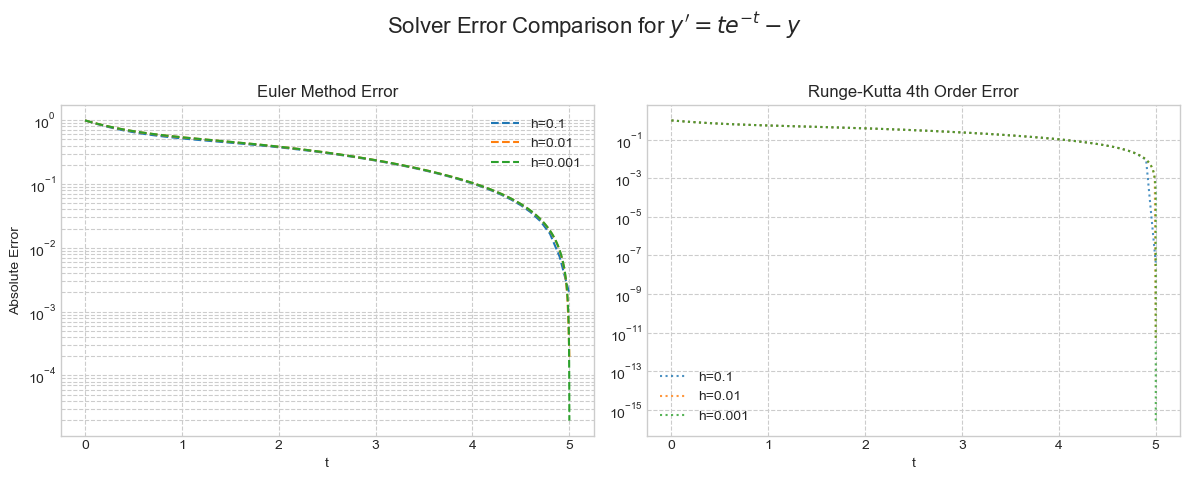

In [15]:
yprime_2 = lambda t, y: t*np.exp(-t) - y
t0, t_end, y0 = 0, 5, np.array([1])
hvals_2 = [0.1, 0.01, 0.001]

y_exact_func = lambda t: (t**2/ 2 + 1) * np.exp(-5)
y_5_exact = y_exact_func(5)

print(f"Exact Solution for y(5) = {y_5_exact:.10f}\n")
print("h\t\tEuler Approx. (Error)\t\t\t\tRK4 Approx. (Error)")
print("-" * 85)


fig, ax = plt.subplots(1, 2, figsize=(12, 5))

for h in hvals_2:
    
    t_eul6, y_eul6 = Euler(yprime_2, t0, t_end, y0, h)
    y_eul_vals  = y_eul6[:, 0]
    
    t_rk4_6, y_rk4_6 = rungekutta4(yprime_2, t0, t_end, y0, h)
    y_rk4_vals  = y_rk4_6[:, 0]

    y_exact_eul = y_exact_func(t_eul6)
    y_exact_rk4 = y_exact_func(t_rk4_6)
    
     # Errors
    err_eul = np.abs(y_eul_vals - y_exact_eul)
    err_rk4 = np.abs(y_rk4_vals - y_exact_rk4)

    # Print approximations at t=5
    approx_eul = y_eul_vals[-1]
    approx_rk4 = y_rk4_vals[-1]

    print(f"{h}\t\t{approx_eul:.8f} (Error: {abs(approx_eul-y_5_exact):.2e})"
          f"\t\t{approx_rk4:.8f} (Error: {abs(approx_rk4-y_5_exact):.2e})")
    
    ax[0].plot(t_eul6, err_eul, linestyle='--', label=f'h={h}')
    ax[1].plot(t_rk4_6, err_rk4, linestyle=':', label=f'h={h}', alpha=0.8)


fig.suptitle("Solver Error Comparison for $y' = te^{-t} - y$", fontsize=16)

# Euler
ax[0].set_title("Euler Method Error")
ax[0].set_xlabel("t")
ax[0].set_ylabel("Absolute Error")
ax[0].set_yscale('log') # log scale to see error differences
ax[0].legend()
ax[0].grid(True, which="both", ls="--")

# RK4
ax[1].set_title("Runge-Kutta 4th Order Error")
ax[1].set_xlabel("t")
ax[1].set_yscale('log')
ax[1].legend()
ax[1].grid(True, which="both", ls="--")

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust rect for the suptitle
plt.show()

## Exercise 4

Test the [scipy.integrate.solve_ivp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp)

***solve_ivp(fun, t_span, y0, method='RK45', t_eval=None, dense_output=False, events=None, vectorized=False, args=None, //options)***

#### I will be solving $y' = te^{(-t)} - y$ (number three exercise) with scipy.integrate.solve_ivp 

Interval -> 		[0, 5]
Approximate y(5) ->	0.09100441
Exact y(5) -> 		0.09096228
Absolute Error -> 	4.21e-05


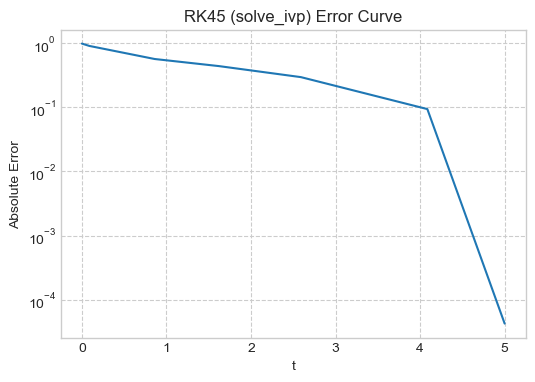

In [16]:
# using the same variable values used in exercise three
t0_t = [t0, t_end]
y0_arr = y0

sol = solve_ivp(yprime_2, t0_t, y0_arr, method='RK45')

t_ivp = sol.t
y_ivp = sol.y[0]
final_t = t_ivp[-1] # final result
final_y = y_ivp[-1] # 1st equation at the last time step

y_exact_ivp = y_exact_func(t_ivp) 
err_ivp = np.abs(y_ivp - y_exact_ivp)


print(f"Interval -> \t\t[{t0_t[0]}, {t0_t[1]}]")
print(f"Approximate y(5) ->\t{final_y:.8f}")
print(f"Exact y(5) -> \t\t{y_5_exact:.8f}")
print(f"Absolute Error -> \t{np.abs(final_y - y_5_exact):.2e}")


plt.figure(figsize=(6,4))
plt.plot(t_ivp, err_ivp)
plt.yscale('log')
plt.xlabel("t")
plt.ylabel("Absolute Error")
plt.title("RK45 (solve_ivp) Error Curve")
plt.grid(True, ls='--')
plt.show()

#### Comparing the different methods
| Method | Approximation | Error | 
| :--- | :---: | ---: |
| solve_ivp | 0.09100441| 4.21e-05|
| Euler (0.001)| 0.09094264| 1.96e-05|
| RungeKutta4 (0.001) | 0.09096228| 2.78e-16|

## Exercise 5

Lokta-Volterra Equations:
$$\begin{cases}
 & \displaystyle{\frac{dx}{dt} = \alpha x - \beta xy } \\
 & \displaystyle{\frac{dy}{dt} = \delta xy - \gamma y}
 \end{cases}$$
 where
* x is the number of prey
* y is the number of some predator
* $\alpha$, $\beta$, $\gamma$, $\delta$ are positive real parameters describing the interaction of the two species.
* The prey are assumed to have an unlimited food supply and to reproduce exponentially, unless subject to predation; this exponential growth is represented in the equation above by the term $\alpha x$. 
* The rate of predation upon the prey is represented above by $\beta xy$. If either x or y is zero, then there can be no predation.
* $\delta xy$ represents the growth of the predator population.
* $\gamma y$ represents the loss rate of the predators due to either natural death or emigration, it leads to an exponential decay in the absence of prey

In [17]:
def LokVol_eq(t, z, a, b, c, d):
    '''
    This function is the Lotka-Volterra equation.
    '''
    x, y = z
    dxdt = a * x - b * x * y
    dydt = c * x * y - d * y

    return np.array([dxdt, dydt])

1. Solve the Lokta-Volterra equations with  the 4 different methods, with
   - $\alpha= 1/3$,
   - $\beta = 3/4$,
   - $\gamma = 1 = \delta$

In [18]:
a = 1/3
b = 3/4
c = 1
d = c

In [19]:
f6 = lambda t, z: LokVol_eq(t, z, a, b, c, d)
y0 = np.array([2.0, 1.0]) # Start with 2 prey, 1 predator

t0_2, t_end_2 = 0, 30
h = 0.01

# # Method 1: My Euler's Method
t_eul_lv, y_eul_lv =  Euler(f6, t0_2, t_end_2, y0, h)
x_eul_lv, y_eul_lv_ = y_eul_lv[:, 0], y_eul_lv[:, 1] # Separate x and y

# # Method 2: My RK4 Method
t_rk4_lv, y_rk4_lv = rungekutta4(f6, t0_2, t_end_2, y0, h)
x_rk4_lv, y_rk4_lv_ = y_rk4_lv[:, 0], y_rk4_lv[:, 1]

h     | Time       | Euler x         | Euler y         | RK4 x           | RK4 y          
0.01  | 30.00      | 0.343891        | 0.193830        | 0.375842        | 0.183858       


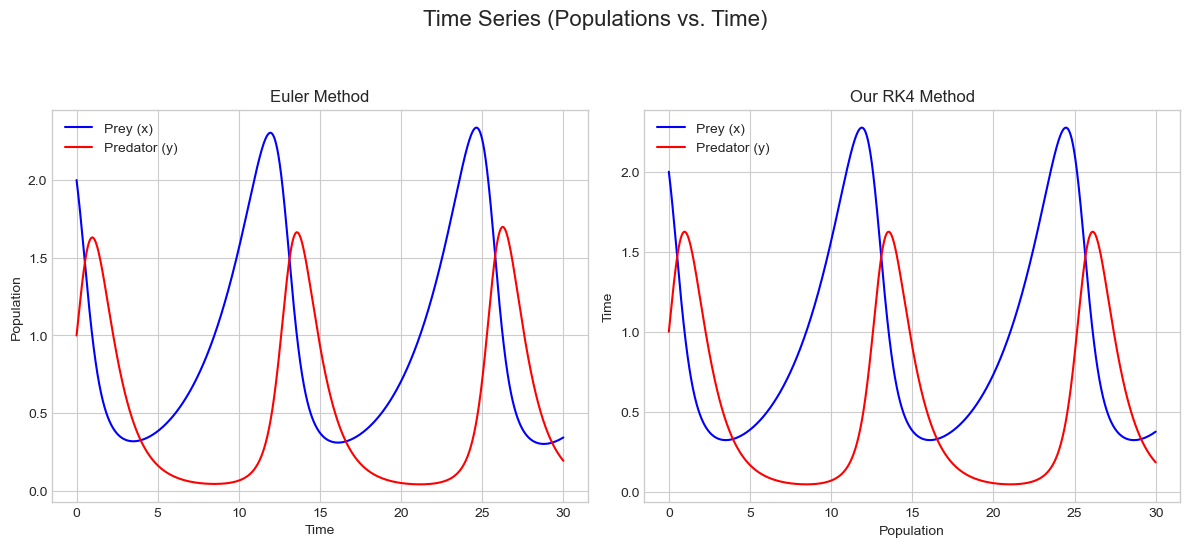

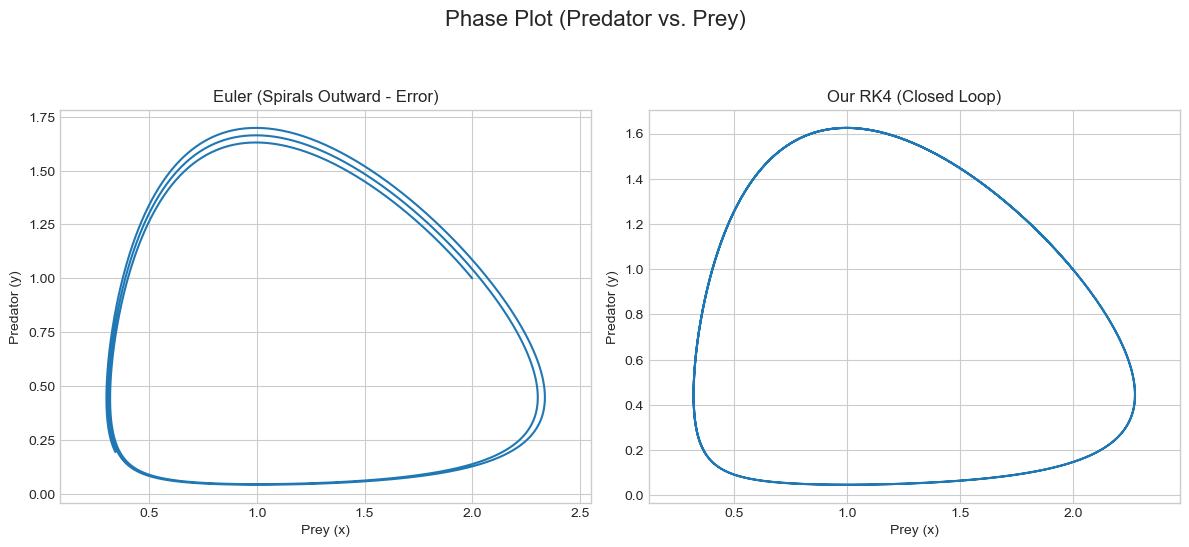

In [20]:
print(f"{'h':<5} | {'Time':<10} | {'Euler x':<15} | {'Euler y':<15} | {'RK4 x':<15} | {'RK4 y':<15}")
print(f"{h:<5} | {t_eul_lv[-1]:<10.2f} | {y_eul_lv[-1, 0]:<15.6f} | {y_eul_lv[-1, 1]:<15.6f} | {y_rk4_lv[-1, 0]:<15.6f} | {y_rk4_lv[-1, 1]:<15.6f}")

# Graph 1: Time Series (Population vs. Time)
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.plot(t_eul_lv, x_eul_lv, color = 'b', label='Prey (x)')
plt.plot(t_eul_lv, y_eul_lv_, color = 'r', label='Predator (y)')
plt.title('Euler Method')
plt.xlabel('Time'); plt.ylabel('Population')
plt.legend(loc = "best")

plt.subplot(2, 2, 2)
plt.plot(t_rk4_lv, x_rk4_lv, color = 'b', label='Prey (x)')
plt.plot(t_rk4_lv, y_rk4_lv_, color = 'r', label='Predator (y)')
plt.title('Our RK4 Method')
plt.xlabel('Population'); plt.ylabel('Time')
plt.legend(loc = 'best')

plt.suptitle("Time Series (Populations vs. Time)", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Graph 2: Phase Plot (Predator vs. Prey)
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.plot(x_eul_lv, y_eul_lv_)
plt.axis('equal')
plt.title('Euler (Spirals Outward - Error)')
plt.xlabel('Prey (x)'); plt.ylabel('Predator (y)')

plt.subplot(2, 2, 2)
plt.plot(x_rk4_lv, y_rk4_lv_)
plt.axis('equal')
plt.title('Our RK4 (Closed Loop)')
plt.xlabel('Prey (x)'); plt.ylabel('Predator (y)')

plt.suptitle("Phase Plot (Predator vs. Prey)", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

2. Try another cool set of value and solve it.

In [21]:
a = 1
b = 0.1
c = 0.075
d = 1.5

In [22]:
f7 = lambda t, z: LokVol_eq(t, z, a, b, c, d)
y0_new = np.array([10.0, 5.0]) # Start with 10 prey, 5 predator
t0_2, t_end_2 = 0, 30
h = 0.01

# # Method 1: My Euler's Method
t_eul_lv, y_eul_lv =  Euler(f7, t0_2, t_end_2, y0_new, h)
x_eul_lv, y_eul_lv_ = y_eul_lv[:, 0], y_eul_lv[:, 1] # Separate x and y

# # Method 2: My RK4 Method
t_rk4_lv, y_rk4_lv = rungekutta4(f7, t0_2, t_end_2, y0_new, h)
x_rk4_lv, y_rk4_lv_ = y_rk4_lv[:, 0], y_rk4_lv[:, 1]

h     | Time       | Euler x         | Euler y         | RK4 x           | RK4 y          
0.01  | 30.00      | 40.727881       | 4.509800        | 40.163790       | 11.924133      


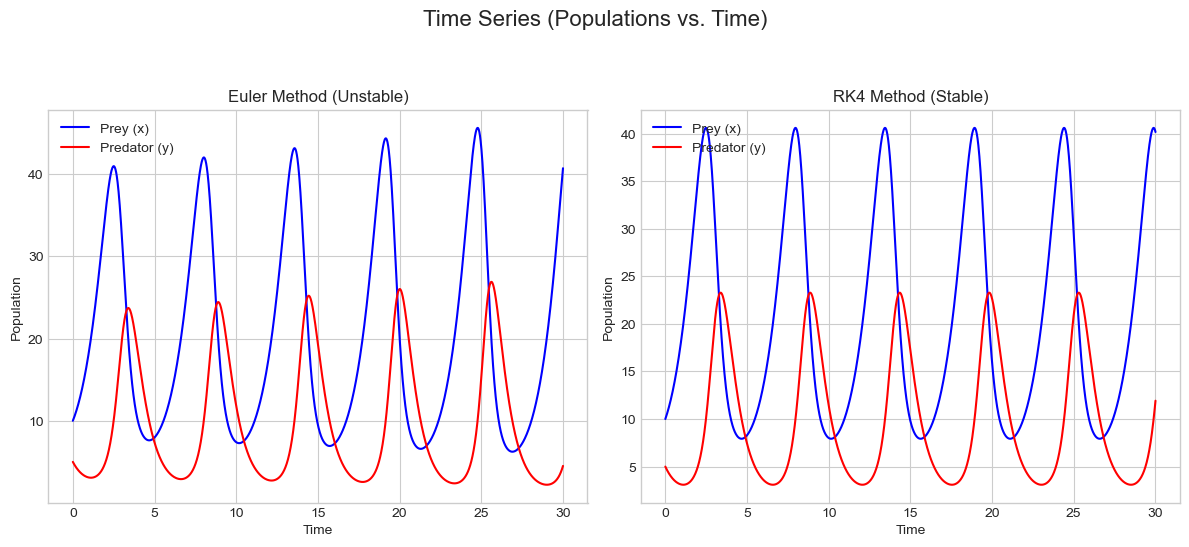

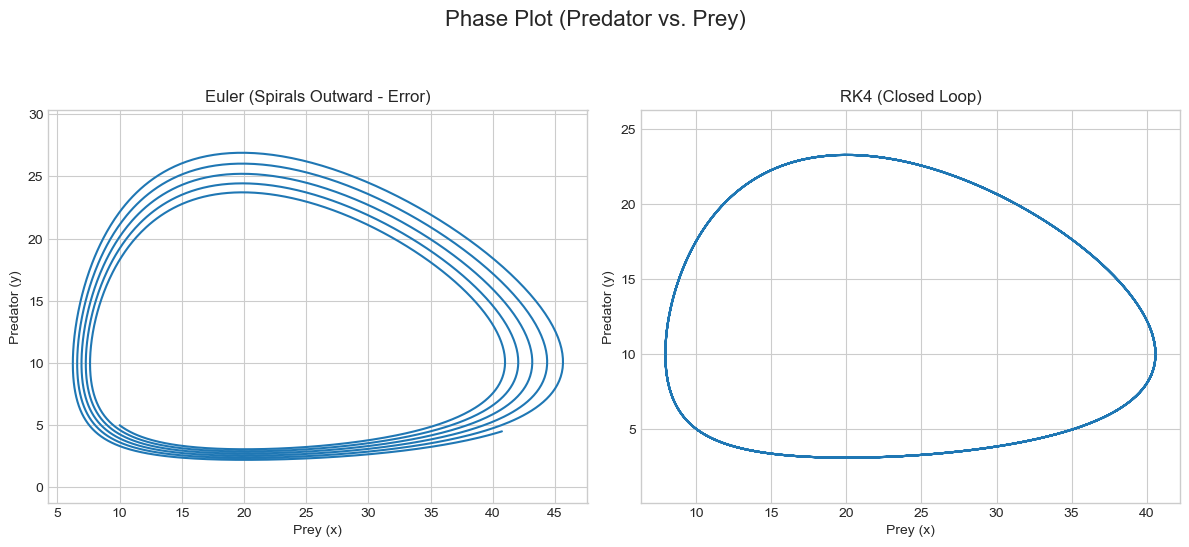

In [23]:
print(f"{'h':<5} | {'Time':<10} | {'Euler x':<15} | {'Euler y':<15} | {'RK4 x':<15} | {'RK4 y':<15}")
print(f"{h:<5} | {t_eul_lv[-1]:<10.2f} | {y_eul_lv[-1, 0]:<15.6f} | {y_eul_lv[-1, 1]:<15.6f} | {y_rk4_lv[-1, 0]:<15.6f} | {y_rk4_lv[-1, 1]:<15.6f}")

# Graph 1: Time Series (Population vs. Time)
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.plot(t_eul_lv, x_eul_lv, color = 'b', label='Prey (x)')
plt.plot(t_eul_lv, y_eul_lv_, color = 'r', label='Predator (y)')
plt.title('Euler Method (Unstable)')
plt.xlabel('Time'); plt.ylabel('Population')
plt.legend(loc = "best")

plt.subplot(2, 2, 2)
plt.plot(t_rk4_lv, x_rk4_lv, color = 'b', label='Prey (x)')
plt.plot(t_rk4_lv, y_rk4_lv_, color = 'r', label='Predator (y)')
plt.title('RK4 Method (Stable)')
plt.xlabel('Time'); plt.ylabel('Population')
plt.legend(loc = 'best')

plt.suptitle("Time Series (Populations vs. Time)", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Graph 2: Phase Plot (Predator vs. Prey)
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.plot(x_eul_lv, y_eul_lv_)
plt.axis('equal')
plt.title('Euler (Spirals Outward - Error)')
plt.xlabel('Prey (x)'); plt.ylabel('Predator (y)')

plt.subplot(2, 2, 2)
plt.plot(x_rk4_lv, y_rk4_lv_)
plt.axis('equal')
plt.title('RK4 (Closed Loop)')
plt.xlabel('Prey (x)'); plt.ylabel('Predator (y)')

plt.suptitle("Phase Plot (Predator vs. Prey)", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Exercise 6

Solve the pendulum equations
$$\begin{cases}
\frac{d\theta}{dt} &= \omega \\
\frac{d\omega}{dt} &=\frac{b}{m}\omega + \frac{g}{L}\sin(\theta)
\end{cases}$$
with 
* $L$ is the length of the pendulum
* $\theta$ is the angle
* $b$ is the damping coefficient
* $g$ is the gravity


![Alt text](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Faleksandarhaber.com%2Fwp-content%2Fuploads%2F2020%2F03%2Fpendulum1.jpg&f=1&nofb=1&ipt=66ff055ec65998da85ef499095f3b9d6602cec3fe7fb3c6b1550054043ef99ea&ipo=images)


For our case we can pick $L=1$, $b=0.05$, $g=9.81$, $m=1$. Start with $\theta=\pi/2$ and solve the ODE.

In [24]:
def pendulum(t, y, L, m, b, g):
    theta, omega = y
    dtheta_dt = omega
    domega_dt = - b/m * omega - (g/L) * np.sin(theta)
    return np.array([dtheta_dt, domega_dt])

In [25]:
L = 1
b = 0.05
g = 9.81
m = 1.0

t_span = [0, 20]
y0_pen = np.array([np.pi/2 , 0.0])
h = 0.01

f_pendulum = lambda t, y: pendulum(t, y, L = 1, m = 1, b = 0.05, g = 9.81)

# Euler's Method
t_eul_pen, y_eul_pen =  Euler(f_pendulum, t_span[0], t_span[1], y0_pen, h)
theta_eul, omega_eul = y_eul_pen[:, 0], y_eul_pen[:, 1] 

# RK4 Method
t_rk4_pen, y_rk4_pen = rungekutta4(f_pendulum, t_span[0], t_span[1], y0_pen, h)
theta_rk4, omega_rk4 = y_rk4_pen[:, 0], y_rk4_pen[:, 1]

h     | Time       | Euler θ         | Euler ω         | RK4 θ           | RK4 ω          
0.01  | 20.00      | 1.753522        | -1.756539       | 0.873693        | -0.774193      


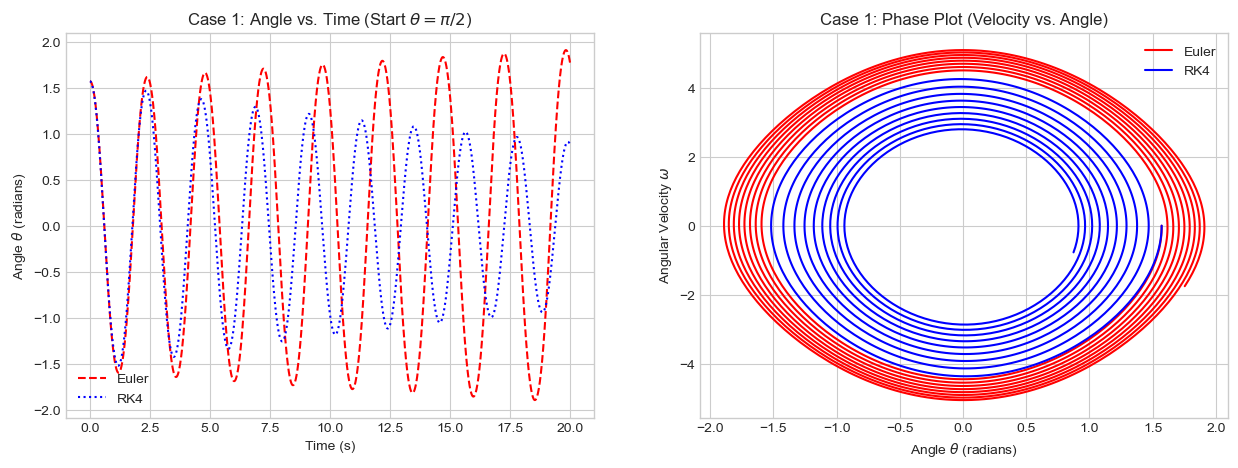

In [26]:
print(f"{'h':<5} | {'Time':<10} | {'Euler θ':<15} | {'Euler ω':<15} | {'RK4 θ':<15} | {'RK4 ω':<15}")
print(f"{h:<5} | {t_eul_pen[-1]:<10.2f} | {y_eul_pen[-1, 0]:<15.6f} | {y_eul_pen[-1, 1]:<15.6f} | {y_rk4_pen[-1, 0]:<15.6f} | {y_rk4_pen[-1, 1]:<15.6f}")

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Time Series for Case 1 (θ(0) = π/2)
ax[0].plot(t_eul_pen, theta_eul, label='Euler', color='r', linestyle='--')
ax[0].plot(t_rk4_pen, theta_rk4, label= 'RK4', color='b', linestyle=':')
ax[0].set_title('Case 1: Angle vs. Time (Start $\\theta = \\pi/2$)')
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Angle $\\theta$ (radians)')
ax[0].legend()

# Plot 2: Phase Plot for Case 1 (θ(0) = π/2)
ax[1].plot(theta_eul, omega_eul, color = 'r', label='Euler')
ax[1].plot(theta_rk4, omega_rk4, color = 'b', label='RK4')
ax[1].set_title('Case 1: Phase Plot (Velocity vs. Angle)')
ax[1].set_xlabel('Angle $\\theta$ (radians)')
ax[1].set_ylabel('Angular Velocity $\\omega$')
ax[1].legend()

### Try with a different starting $\theta$ and solve the ODE.
- Case 2 $\longrightarrow \theta(0)  = \frac{\pi}{4}$

In [27]:
y0_pen_2= np.array([np.pi/4 , 0.0])

# Euler's Method
t_eul_pen_2, y_eul_pen_2 =  Euler(f_pendulum, t_span[0], t_span[1], y0_pen_2, h)
theta_eul_2, omega_eul_2 = y_eul_pen_2[:, 0], y_eul_pen_2[:, 1] 

# RK4 Method
t_rk4_pen_2, y_rk4_pen_2 = rungekutta4(f_pendulum, t_span[0], t_span[1], y0_pen_2, h)
theta_rk4_2, omega_rk4_2 = y_rk4_pen_2[:, 0], y_rk4_pen_2[:, 1]

h     | Time       | Euler θ         | Euler ω         | RK4 θ           | RK4 ω          
0.01  | 20.00      | -0.864746       | -2.198590       | -0.065024       | 1.450329       


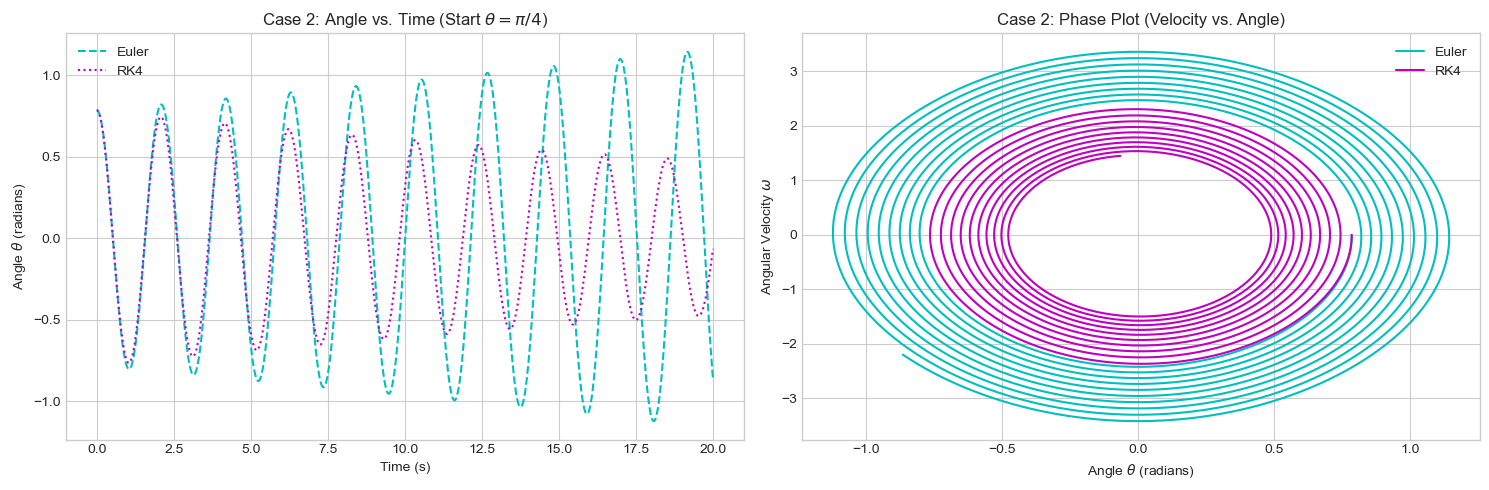

In [28]:
print(f"{'h':<5} | {'Time':<10} | {'Euler θ':<15} | {'Euler ω':<15} | {'RK4 θ':<15} | {'RK4 ω':<15}")
print(f"{h:<5} | {t_eul_pen_2[-1]:<10.2f} | {y_eul_pen_2[-1, 0]:<15.6f} | {y_eul_pen_2[-1, 1]:<15.6f} | {y_rk4_pen_2[-1, 0]:<15.6f} | {y_rk4_pen_2[-1, 1]:<15.6f}")

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(t_eul_pen_2, theta_eul_2, color = 'c', label='Euler', linestyle='--')
ax[0].plot(t_rk4_pen_2, theta_rk4_2, color = 'm', label='RK4', linestyle=':')
ax[0].set_title('Case 2: Angle vs. Time (Start $\\theta = \\pi/4$)')
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Angle $\\theta$ (radians)')
ax[0].legend()

ax[1].plot(theta_eul_2, omega_eul_2, color = 'c', label='Euler')
ax[1].plot(theta_rk4_2, omega_rk4_2, color = 'm', label='RK4')
ax[1].set_title('Case 2: Phase Plot (Velocity vs. Angle)')
ax[1].set_xlabel('Angle $\\theta$ (radians)')
ax[1].set_ylabel('Angular Velocity $\\omega$')
ax[1].legend()

plt.tight_layout()
plt.show()

## BONUS (Optional)

### Exercise 7

The SIR model. To learn more you can see [Compartemental Model](https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology) or [SIR Modeling - Western Kentucky University
](https://people.wku.edu/lily.popova.zhuhadar/)

* $S(t)$: the number of individuals susceptible of contracting the infection at time $t$,
* $I(t)$: the number of individuals that are alive and infected at time t;
* $R(t)$: the cumulative number of individuals that recovered from the disease up to time t;

In addition, $N$ is the total number of people in the area at time $t$ with $N = S(t) + I(t) + R(t)$.
The SIR model is given by the following expressions:
$$
\begin{equation} 
\begin{split}
\dfrac{dS}{dt} &=  -\frac{\beta I S}{N}, \\ 
\dfrac{dI}{dt} &=  \frac{\beta I S}{N} - \gamma I\\
\dfrac{dR}{dt} &= \gamma I,\\
\end{split}
\end{equation}
$$

In [29]:
def SIR(t, y, b, g, N):
    
    S, I, R = y # y is a vector [S,I,R]
    
    dS_dt = - (b * I * S)/N
    dR_dt = g*I
    dI_dt = -dS_dt - dR_dt
    
    return np.array([dS_dt, dI_dt, dR_dt])

#### Part I
Pick $\beta=0.2$, $\gamma=1/10$, $N=1000$, $I(0)=1$, solve this epidemic problem. What is the percentage of Recovered/Immuned indivual needed for the desease to stop spreading?

In [30]:
b = 0.2
g = 1/10
N = 1000
I0 = 1
R0 = 0
S0 = N - I0 - R0 # N = S + I + R

Peak infected = 153.93 people at t = 67.57 days

h       | Time       | RK4 S           | RK4 I           | RK4 R          
----------------------------------------------------------------------
0.01    | 200.00     | 202.96          | 0.16            | 796.88         

Herd immunity threshold = 50.0%



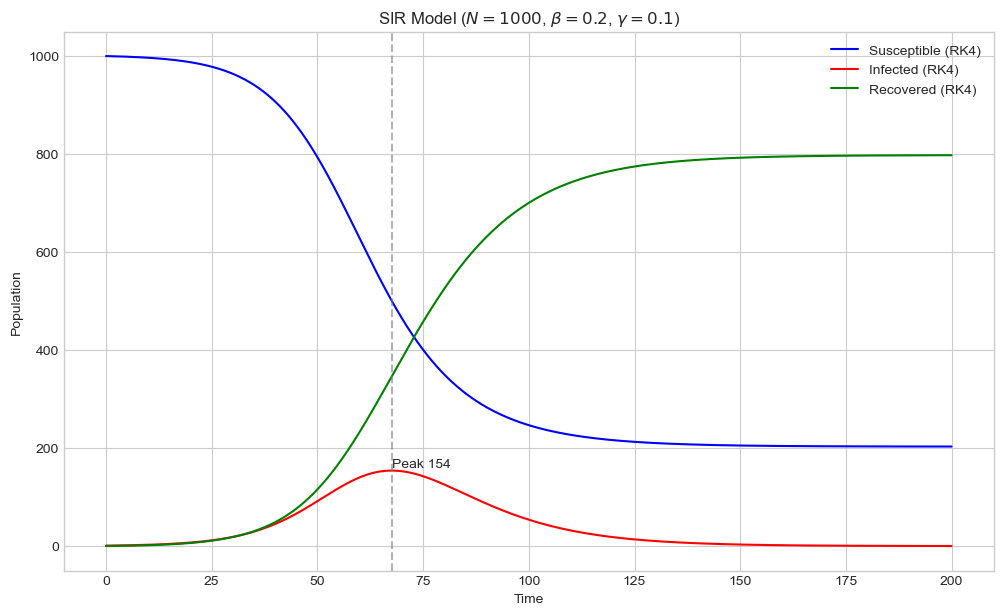

In [31]:
y0_1 = np.array([S0, I0, R0])
t_span = [0, 200]

h = 0.01
f_sir = lambda t, y: SIR(t, y, b = b, g = g, N = N)

# RK4 Method
t_rk4_sir, y_rk4_sir = rungekutta4(f_sir, t_span[0], t_span[1], y0_1, h)
S_rk4, I_rk4, R_rk4 = y_rk4_sir[:, 0], y_rk4_sir[:, 1], y_rk4_sir[:, 2]

peak_I = np.max(I_rk4)
peak_time = t_rk4_sir[np.argmax(I_rk4)]

print(f"Peak infected = {peak_I:.2f} people at t = {peak_time:.2f} days\n")

# Herd immunity
R0_b = b / g
herd_threshold = 1 - 1/R0_b

print(f"{'h':<7} | {'Time':<10} | {'RK4 S':<15} | {'RK4 I':<15} | {'RK4 R':<15}")
print("-" * 70)

print(f"{h:<7.2f} | {t_rk4_sir[-1]:<10.2f} | "
      f"{y_rk4_sir[-1, 0]:<15.2f} | {y_rk4_sir[-1, 1]:<15.2f} | {y_rk4_sir[-1, 2]:<15.2f}\n")
print(f"Herd immunity threshold = {herd_threshold*100:.1f}%\n")

plt.figure(figsize=(12, 7))
plt.plot(t_rk4_sir, S_rk4, label='Susceptible (RK4)', color='b')
plt.plot(t_rk4_sir, I_rk4, label='Infected (RK4)', color='red')
plt.plot(t_rk4_sir, R_rk4, label='Recovered (RK4)', color='green')
plt.axvline(peak_time, color='gray', linestyle='--', alpha=0.6)
plt.text(peak_time, peak_I, f"Peak {peak_I:.0f}", va='bottom')

plt.title(f'SIR Model ($N={N}$, $\\beta={b}$, $\\gamma={g}$)')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.show()

#### Part II

Find and model the spread of specific desease/infection using the SIR model.

In [32]:
# Ebola
b2 = 0.15
g2 = 0.1
N2 = 1000
I0_2 = 10
R0_2 = 0
S0_2 = N2 - I0_2 - R0_2 # N = S + I + R

Peak infected = 69.72 people at t = 65.14 days

h       | Time       | RK4 S           | RK4 I           | RK4 R          
----------------------------------------------------------------------
0.01    | 200.00     | 408.18          | 1.16            | 590.66         

Herd immunity threshold = 50.0%



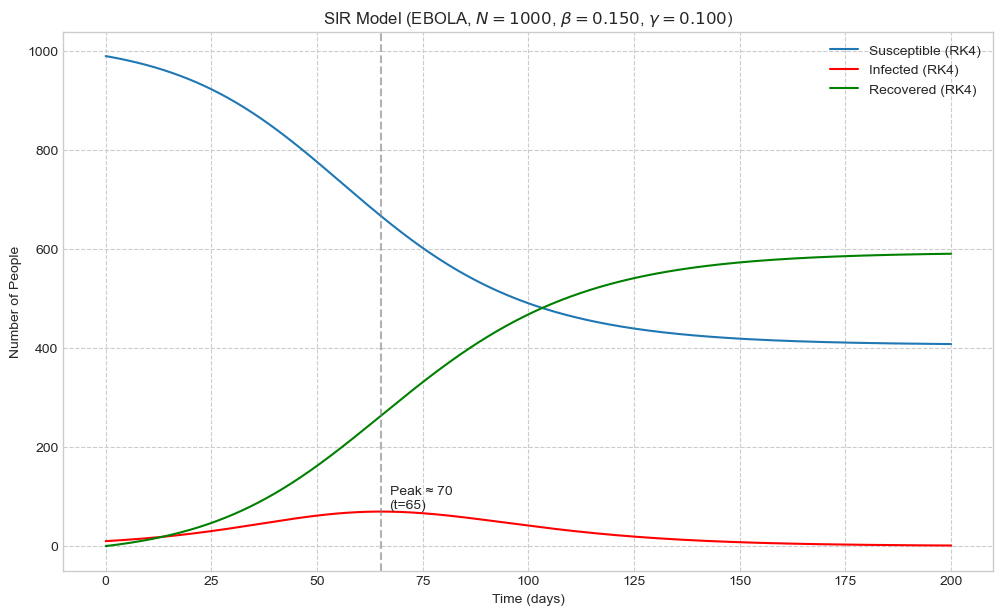

In [33]:
y0_2 = np.array([S0_2, I0_2, R0_2])
t_span = [0, 200]

f_sir = lambda t, y: SIR(t, y, b = b2, g = g2, N = N2)

# RK4 Method
t_rk4_sir_2, y_rk4_sir_2 = rungekutta4(f_sir, t_span[0], t_span[1], y0_2, h)
S_rk4_2, I_rk4_2, R_rk4_2 = y_rk4_sir_2[:, 0], y_rk4_sir_2[:, 1], y_rk4_sir_2[:, 2]

peak_I = np.max(I_rk4_2)
peak_time = t_rk4_sir_2[np.argmax(I_rk4_2)]
print(f"Peak infected = {peak_I:.2f} people at t = {peak_time:.2f} days\n")

R0_b = b2 / g2
herd_fraction = 1 - 1.0 / R0_b if R0_b > 1 else 0.0

print(f"{'h':<7} | {'Time':<10} | {'RK4 S':<15} | {'RK4 I':<15} | {'RK4 R':<15}")
print("-" * 70)
print(f"{h:<7.2f} | {t_rk4_sir_2[-1]:<10.2f} | "
      f"{y_rk4_sir_2[-1, 0]:<15.2f} | {y_rk4_sir_2[-1, 1]:<15.2f} | {y_rk4_sir_2[-1, 2]:<15.2f}\n")
print(f"Herd immunity threshold = {herd_threshold*100:.1f}%\n")

plt.figure(figsize=(12, 7))
plt.plot(t_rk4_sir_2, S_rk4_2, label='Susceptible (RK4)')
plt.plot(t_rk4_sir_2, I_rk4_2, label='Infected (RK4)', color='red')
plt.plot(t_rk4_sir_2, R_rk4_2, label='Recovered (RK4)', color='green')
plt.axvline(peak_time, color='gray', ls='--', alpha=0.6)
plt.text(peak_time+2, peak_I, f"Peak ≈ {peak_I:.0f}\n(t={peak_time:.0f})", va='bottom')

plt.title(f'SIR Model (EBOLA, $N={N2}$, $\\beta={b2:.3f}$, $\\gamma={g2:.3f}$)')
plt.xlabel('Time (days)')
plt.ylabel('Number of People')
plt.legend()
plt.grid(True, ls='--')
plt.show()

### Exercise 8

Use the Euler Implicit method to approximate/plot the solutions to each of the following initial-value. See [Euler Implicite](https://en.wikipedia.org/wiki/Backward_Euler_method).

formula:  $y_{n1} = y_n + h * f(t_{n1}, y_{n1})$

1. $y' = -ty + 4t/y$, $0 \leq t \leq 1$, $y(0) = 1$, with $h = 0.1$

Euler approx = 1.700215
Implicit Euler approx = 1.703510


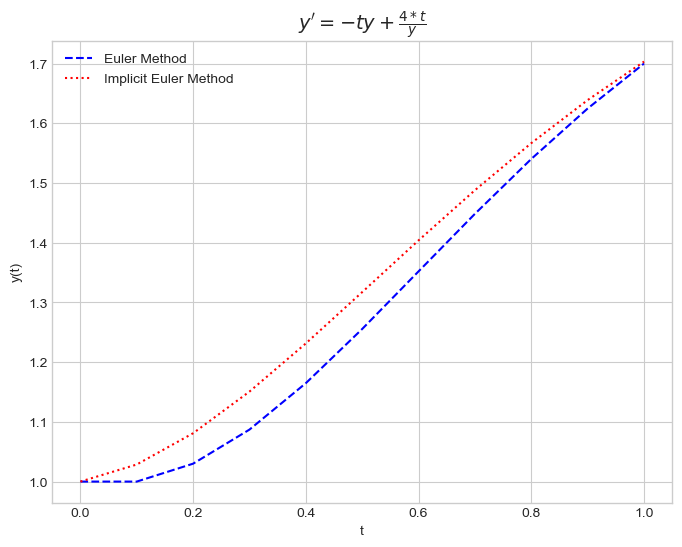

In [34]:
f7 = lambda t, y: -t*y + (4*t)/y

t0, t_end, y0, h = 0, 1, np.array([1.0]), 0.1 # variables
t_eul7, y_eul7 = Euler(f7, t0, t_end, y0, h) # calculating Euler
t_eul7_b, y_eul7_b = Euler_Backwards(f7, t0, t_end, y0, h) # calculating Backward Euler

print(f"Euler approx = {y_eul7[-1, 0]:.6f}\nImplicit Euler approx = {y_eul7_b[-1, 0]:.6f}")

# plotting the graph
plt.figure(figsize = (8,6))
plt.plot(t_eul7, y_eul7[:, 0], color='blue', label="Euler Method", linestyle='--')
plt.plot(t_eul7_b, y_eul7_b[:, 0], color = 'red', label="Implicit Euler Method", linestyle=':')
plt.title(r"$y' = -ty + \frac{4*t}{y}$", fontsize=14)
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.show()

2. $y' = \frac{y^2+y}{t}$, $1 \leq  t  \leq 3$, $y(l) = -2$, with $h = 0.2$ 

Euler approx = -1.145527
Implicit Euler approx = -1.245600


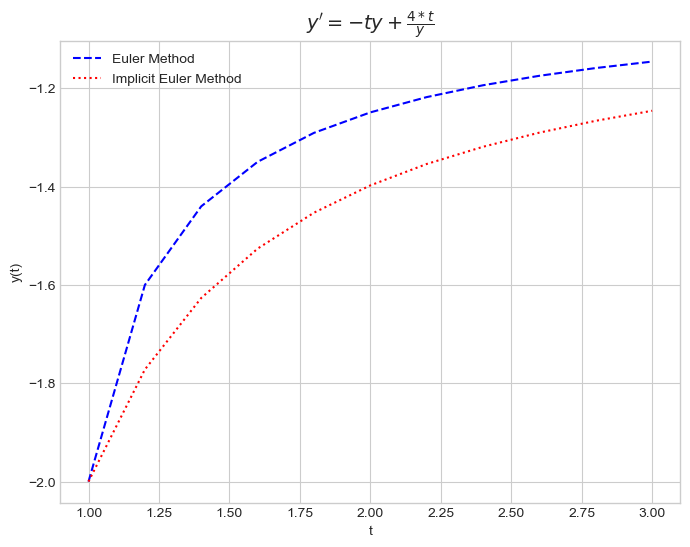

In [35]:
f8 = lambda t, y: (y**2 + y)/t

t0, t_end, y0, h = 1, 3, np.array([-2]), 0.2 # variables
t_eul8, y_eul8 = Euler(f8, t0, t_end, y0, h) # calculating Euler
t_eul8_b, y_eul8_b = Euler_Backwards(f8, t0, t_end, y0, h) # calculating Backward Euler

print(f"Euler approx = {y_eul8[-1, 0]:.6f}\nImplicit Euler approx = {y_eul8_b[-1, 0]:.6f}")

# plotting the graph
plt.figure(figsize = (8,6))
plt.plot(t_eul8, y_eul8[:, 0], color='blue', label="Euler Method", linestyle='--')
plt.plot(t_eul8_b, y_eul8_b[:, 0], color = 'red', label="Implicit Euler Method", linestyle=':')
plt.title(r"$y' = -ty + \frac{4*t}{y}$", fontsize=14)
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.show()